In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
import seaborn as sns
from numpy import median
import numpy as np
%matplotlib inline

In [3]:
env='Ant-v4'

In [4]:
!echo $PYTHONPATH

/home/daniel/COMPER-GYM-RESULTS


In [5]:
df_comper = pd.DataFrame()
for i in range(1,6):
  path ='COMPER_DDPG/data/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_comper = pd.concat([df_comper,aux])
df_comper["Method"]="COMPER"
#df_comper = df_comper.set_index(["Trial"])

print(df_comper.shape)

(1250, 17)


In [6]:
df_ddpg = pd.DataFrame()
for i in range(1,6):
  path ='DPPG/data/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_ddpg = pd.concat([df_ddpg,aux])
df_ddpg["Method"]="DDPG"
#df_ddpg = df_ddpg.set_index(["Trial"])
print(df_ddpg.shape)

#/home/daniel/COMPER-GYM-RESULTS/DPPG/data/Ant-v4/train/trial1/progress.json

(1518, 17)


In [7]:
df_comper.head(15)

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Ant-v4,17-05-2023 18:51:33,200,0,200,0.009941,1,201,False,41.154984,41.154984,41.154984,41.154984,41.154984,COMPER
1,1,2,Ant-v4,17-05-2023 18:55:53,400,0,400,0.019882,1,401,False,122.748093,81.951538,81.951538,81.951538,81.951538,COMPER
2,1,3,Ant-v4,17-05-2023 19:00:23,600,0,600,0.029822,1,601,False,102.913071,88.938716,88.938716,88.938716,88.938716,COMPER
3,1,4,Ant-v4,17-05-2023 19:04:55,800,0,800,0.039763,1,801,False,224.704460,122.880152,122.880152,122.880152,122.880152,COMPER
4,1,5,Ant-v4,17-05-2023 19:09:31,1000,0,1000,0.049704,1,1001,False,374.296697,173.163461,173.163461,173.163461,173.163461,COMPER
5,1,6,Ant-v4,17-05-2023 19:14:03,1200,0,1200,0.059645,1,1201,False,544.207537,235.004140,235.004140,235.004140,235.004140,COMPER
6,1,7,Ant-v4,17-05-2023 19:18:30,1400,0,1400,0.069586,1,1401,False,560.677876,281.528960,281.528960,281.528960,281.528960,COMPER
7,1,8,Ant-v4,17-05-2023 19:23:03,1600,0,1600,0.079526,1,1601,False,739.726216,338.803617,338.803617,338.803617,338.803617,COMPER
8,1,9,Ant-v4,17-05-2023 19:27:26,1800,0,1800,0.089467,1,1801,False,842.432532,394.762385,394.762385,394.762385,394.762385,COMPER
9,1,10,Ant-v4,17-05-2023 19:31:50,2000,0,2000,0.099408,1,2001,False,761.536872,431.439834,431.439834,431.439834,431.439834,COMPER


In [8]:
df_ddpg.head(15)

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Ant-v4,18-05-2023 17:33:53,200,201,0,0.009941,1,201,False,-8.979827,-8.979827,-8.979827,-8.979827,-8.979827,DDPG
1,1,2,Ant-v4,18-05-2023 17:34:05,400,401,0,0.019882,1,401,False,-114.851950,-61.915888,-61.915888,-61.915888,-61.915888,DDPG
2,1,3,Ant-v4,18-05-2023 17:34:16,600,601,0,0.029822,1,601,False,-287.674716,-137.168831,-137.168831,-137.168831,-137.168831,DDPG
3,1,4,Ant-v4,18-05-2023 17:34:27,800,801,0,0.039763,1,801,False,-387.605469,-199.777990,-199.777990,-199.777990,-199.777990,DDPG
4,1,5,Ant-v4,18-05-2023 17:34:39,1000,1001,0,0.049704,1,1001,False,-675.882698,-294.998932,-294.998932,-294.998932,-294.998932,DDPG
5,1,6,Ant-v4,18-05-2023 17:34:50,1200,1201,0,0.059645,1,1201,False,-1257.363414,-455.393012,-455.393012,-455.393012,-455.393012,DDPG
6,1,7,Ant-v4,18-05-2023 17:35:01,1400,1401,0,0.069586,1,1401,False,-1494.488638,-603.835245,-603.835245,-603.835245,-603.835245,DDPG
7,1,8,Ant-v4,18-05-2023 17:35:12,1600,1601,0,0.079526,1,1601,False,-1821.275286,-756.015250,-756.015250,-756.015250,-756.015250,DDPG
8,1,9,Ant-v4,18-05-2023 17:35:23,1800,1801,0,0.089467,1,1801,False,-1675.775559,-858.210840,-858.210840,-858.210840,-858.210840,DDPG
9,1,10,Ant-v4,18-05-2023 17:35:35,2000,2001,0,0.099408,1,2001,False,-1643.871482,-936.776904,-936.776904,-936.776904,-936.776904,DDPG


In [9]:
df=pd.concat([df_comper,df_ddpg])
df.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Ant-v4,17-05-2023 18:51:33,200,0,200,0.009941,1,201,False,41.154984,41.154984,41.154984,41.154984,41.154984,COMPER
1,1,2,Ant-v4,17-05-2023 18:55:53,400,0,400,0.019882,1,401,False,122.748093,81.951538,81.951538,81.951538,81.951538,COMPER
2,1,3,Ant-v4,17-05-2023 19:00:23,600,0,600,0.029822,1,601,False,102.913071,88.938716,88.938716,88.938716,88.938716,COMPER
3,1,4,Ant-v4,17-05-2023 19:04:55,800,0,800,0.039763,1,801,False,224.704460,122.880152,122.880152,122.880152,122.880152,COMPER
4,1,5,Ant-v4,17-05-2023 19:09:31,1000,0,1000,0.049704,1,1001,False,374.296697,173.163461,173.163461,173.163461,173.163461,COMPER


In [10]:
df.tail()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
246,5,247,Ant-v4,10-06-2023 10:20:46,49200,49201,0,0.999,2,43945,False,-5231.076647,-5079.803528,-5938.542351,-5693.822764,-5023.540134,DDPG
247,5,248,Ant-v4,10-06-2023 10:21:24,49400,49401,0,0.999,2,44145,False,-5201.181126,-5080.292953,-5930.966286,-5667.382349,-5057.082970,DDPG
248,5,249,Ant-v4,10-06-2023 10:22:01,49600,49601,0,0.999,2,44345,False,-5196.760920,-5080.760696,-5923.752759,-5642.789486,-5092.070878,DDPG
249,5,250,Ant-v4,10-06-2023 10:22:39,49800,49801,0,0.999,2,44545,False,-5272.477090,-5081.527562,-5916.814848,-5620.731468,-5126.666896,DDPG
250,5,251,Ant-v4,10-06-2023 10:23:16,50000,50001,0,0.999,2,44745,True,-5273.149486,-5082.290996,-5910.484110,-5599.530786,-5164.975677,DDPG


In [11]:
df[["Method","Trial"]].value_counts()

Method  Trial
DDPG    1        501
        3        258
        4        258
        5        251
COMPER  1        250
        2        250
        3        250
        4        250
        5        250
DDPG    2        250
dtype: int64

<Axes: xlabel='TotalItr', ylabel='AvgLast10Ep'>

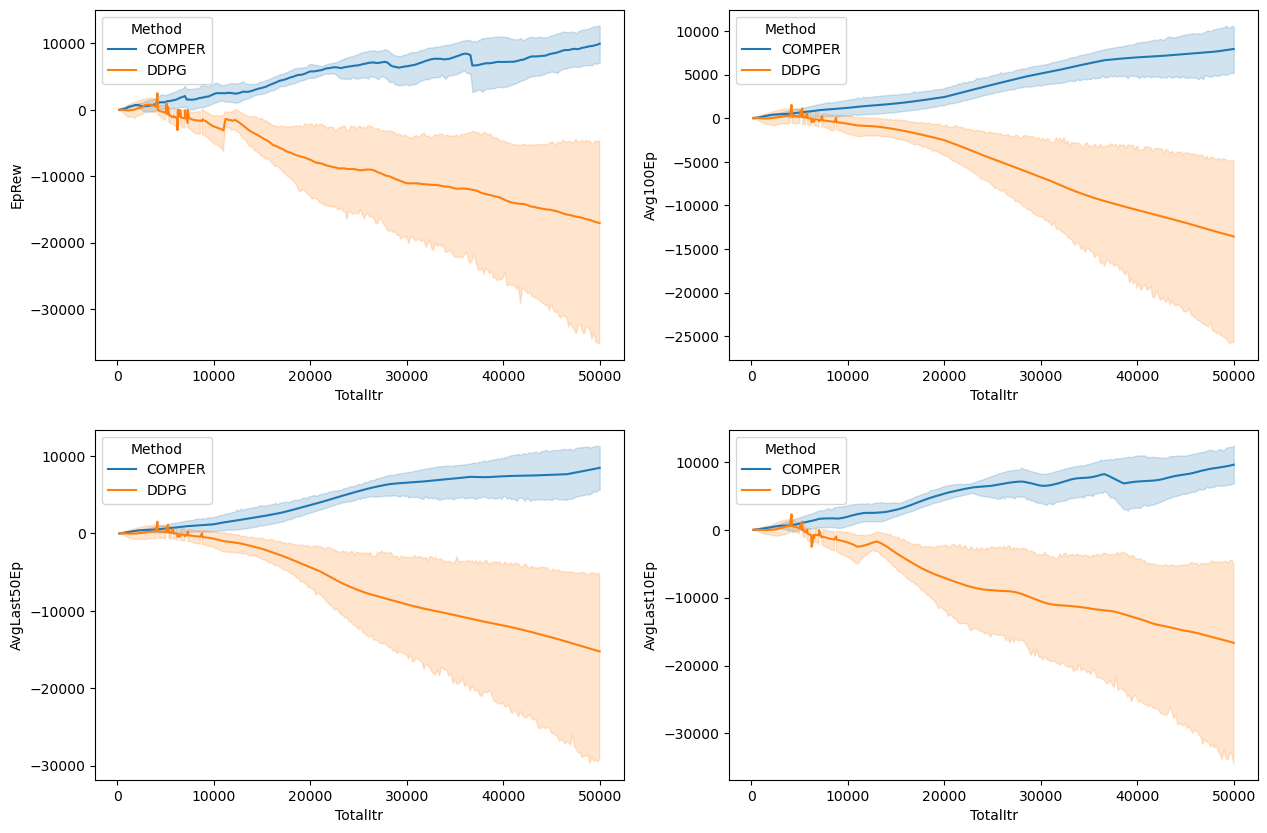

In [12]:
fig, axs = plt.subplots(nrows=2,ncols=2)
fig.set_figwidth(15)
fig.set_figheight(10)
sns.lineplot(data=df, x="TotalItr", y="EpRew",hue='Method',ax=axs[0][0])
sns.lineplot(data=df, x="TotalItr", y="Avg100Ep",hue="Method",ax=axs[0][1])
sns.lineplot(data=df, x="TotalItr", y="AvgLast50Ep",hue="Method",ax=axs[1][0])
sns.lineplot(data=df, x="TotalItr", y="AvgLast10Ep",hue="Method",ax=axs[1][1])



In [65]:
path ='COMPER_DDPG/data/'+env+'/eval/progress.json'
df_comper_eval = pd.read_json(path,lines=True)
df_comper_eval["Method"]="COMPER"
#df_comper_eval=df_comper_eval[df_comper_eval["Trial"]==1]
print(df_comper_eval.shape)
df_comper_eval.head()

(50, 6)


,Trial,Time,Task,Itr,EvalAvgRew,Method
0,1,17-05-2023 20:39:26,Ant-v4,5000,5.449535,COMPER
1,1,17-05-2023 22:35:54,Ant-v4,10000,5.199186,COMPER
2,1,18-05-2023 00:34:31,Ant-v4,15000,2.895213,COMPER
3,1,18-05-2023 02:33:49,Ant-v4,20000,2.344445,COMPER
4,1,18-05-2023 04:31:47,Ant-v4,25000,4.947229,COMPER


In [66]:
df_comper_eval.describe()

,Trial,Itr,EvalAvgRew
count,50.000000,50.000000,50.000000
mean,3.000000,27500.000000,3.214556
std,1.428571,14507.211437,2.498816
min,1.000000,5000.000000,-5.960870
25%,2.000000,15000.000000,2.358098
50%,3.000000,27500.000000,3.211451
75%,4.000000,40000.000000,4.883655
max,5.000000,50000.000000,7.055278


In [67]:
path ='DPPG/data/'+env+'/eval/progress.json'
df_ddpg_eval = pd.read_json(path,lines=True)
#df_ddpg_eval=df_ddpg_eval[df_ddpg_eval["Trial"]==1]
df_ddpg_eval["Method"]="DDPG"
print(df_ddpg_eval.shape)
df_ddpg_eval.head()

(50, 6)


,Trial,Time,Task,Itr,EvalAvgRew,Method
0,1,10-06-2023 00:58:04,Ant-v4,5000,1.261616,DDPG
1,1,10-06-2023 01:06:31,Ant-v4,10000,-0.841530,DDPG
2,1,10-06-2023 01:15:49,Ant-v4,15000,0.236626,DDPG
3,1,10-06-2023 01:25:58,Ant-v4,20000,2.788064,DDPG
4,1,10-06-2023 01:36:55,Ant-v4,25000,1.365801,DDPG


In [68]:
df_ddpg_eval.describe()

,Trial,Itr,EvalAvgRew
count,50.000000,50.000000,50.000000
mean,3.000000,27500.000000,-3.045429
std,1.428571,14507.211437,6.054730
min,1.000000,5000.000000,-15.470803
25%,2.000000,15000.000000,-8.140220
50%,3.000000,27500.000000,-1.311465
75%,4.000000,40000.000000,1.220796
max,5.000000,50000.000000,7.001862


In [ ]:
df_eval=pd.concat([df_comper_eval,df_ddpg_eval])

<Axes: xlabel='Itr', ylabel='EvalAvgRew'>

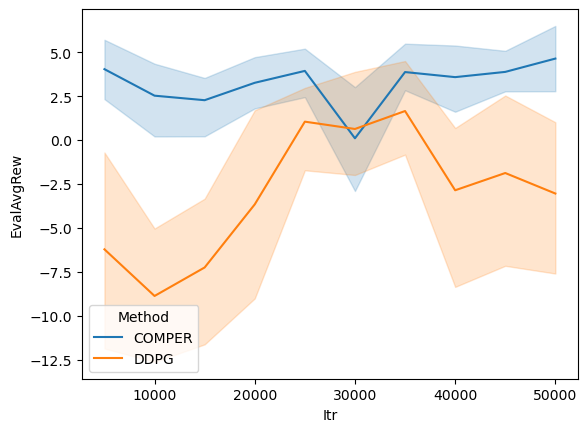

In [70]:
sns.lineplot(data=df_eval, x="Itr", y="EvalAvgRew",hue='Method')